<a href="https://colab.research.google.com/github/archie-cm/Final-Project/blob/main/Machine_Learning_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> Archie Citra Muhammad

# Stage 3 Final Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, get_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
def eval_classification(model): 
  # Prediction
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
  
  # Test Score
    print('Scoring')
    print('Accuracy (Test): %.2f' % accuracy_score(y_test, y_pred))
    print('Accuracy (Train): %.2f' % accuracy_score(y_train, y_pred_train))
    print('Precision (Test): %.2f' % precision_score(y_test, y_pred))
    print('Precision (Train): %.2f' % precision_score(y_train, y_pred_train))
    print('Recall (Test): %.2f' % recall_score(y_test, y_pred))
    print('Recall (Train): %.2f' % recall_score(y_train, y_pred_train))
    print('F1 (Test): %.2f' % f1_score(y_test, y_pred))
    print('F1 (Train): %.2f' % f1_score(y_train, y_pred_train))
    print('AUC (Test Proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    print('AUC (Train Proba): %.2f' % roc_auc_score(y_train, y_pred_proba_train[:,1]))
    print('Test Score: %.2f' % model.score(X_test, y_test))
    print('Train Score: %.2f' % model.score(X_train, y_train))

In [4]:
def show_feature_importance(model):
    plt.figure(figsize=(15, 10))
    feature_imp = pd.Series(model.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

    sns.barplot(x=feature_imp, y=feature_imp.index)

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [5]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [6]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
use_df = df.copy()
df

Mounted at /content/drive


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,"96,270.64",0
9996,9997,15569892,Johnstone,516,France,Male,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,"42,085.58",1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,"75,075.31",2,1,0,"92,888.52",1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
cats = ['Surname', 'Geography', 'Gender']
nums = ['RowNumber','CustomerId','CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']

In [9]:
df[nums].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50","15,690,940.57",650.53,38.92,5.01,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"2,886.90","71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,1.00,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"2,500.75","15,628,528.25",584.00,32.00,3.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"5,000.50","15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"7,500.25","15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"10,000.00","15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


Beberapa pengamatan:
1. Kolom `CreditScore` tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
2. Kolom `RowNumber`,`CustomerId` bisa di-drop di langkah selanjutnya
3. Kolom `Age` tampaknya skew ke kanan (long-right tail), mungkin dapat dilakukan transformasi log nantinya
4. Kolom `HasCrCard`, `IsActiveMember`, dan `Exited` ternyata bernilai boolean/binary

In [10]:
df[cats].describe()

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Beberapa pengamatan:
1. Data dinominasi (proporsi lebih dari 50% dari jumlah baris data) oleh Male (`Gender`) dan France (`Geography`)
2. Kolom `Surname` memiliki kardinalitas (jumlah unique values) yang cukup tinggi (2932). Tampaknya kita perlu exclude fitur ini dari dataset untuk pemodelan.

# Preprocessing

## Feature Selection

In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

### Missing Data

In [12]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Tidak terdapat missing data

### Duplicated Data

In [13]:
df.duplicated().sum()

0

Tidak terdapat duplicated data

## Split Data

In [14]:
X = df.drop(columns = ['Exited'])
y = df[['Exited']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 10) (2000, 10) (8000, 1) (2000, 1)


### Outliers Handling

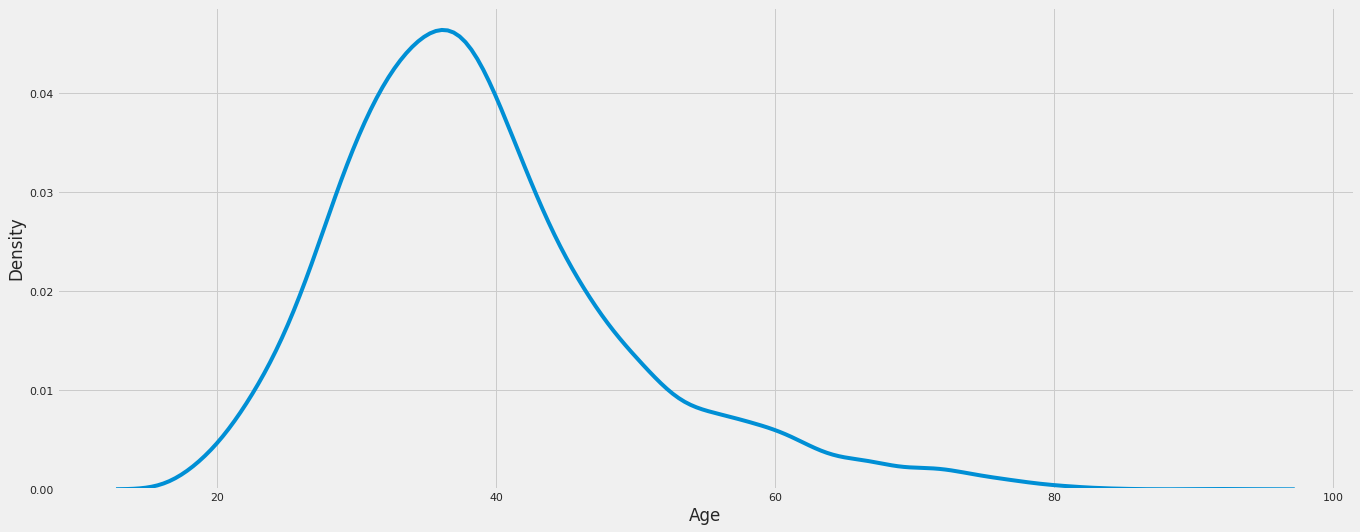

In [16]:
sns.kdeplot(X_train['Age'])

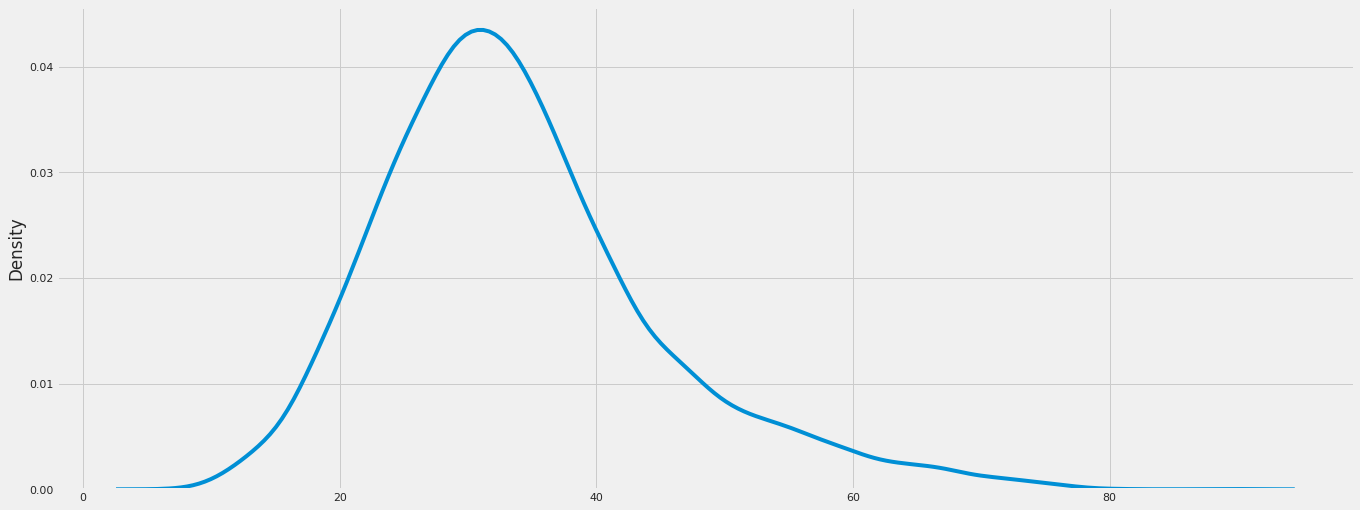

In [17]:
sns.kdeplot((X_train['Age']-X_train['Tenure']))

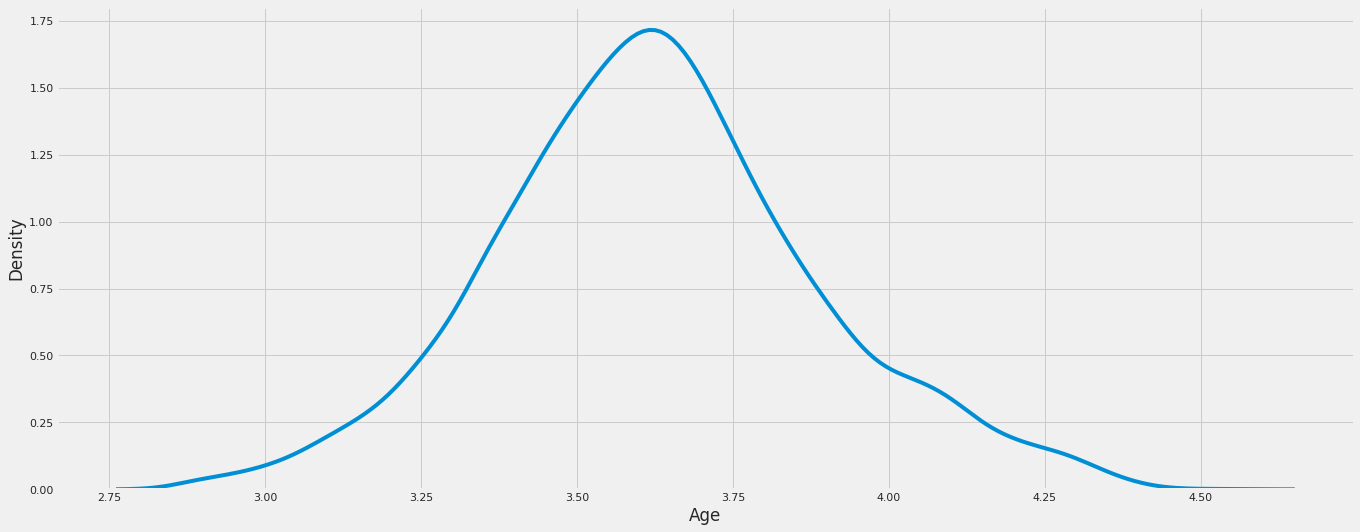

In [18]:
# distribusi Age (setelah log transformation)
sns.kdeplot(np.log(X_train['Age']))

In [19]:
# maka kita transform
X_train['log_Age'] = np.log(X_train['Age'])
X_test['log_Age'] = np.log(X_test['Age'])
X_train['Entry_Age'] = np.log((X_train['Age']-X_train['Tenure']))
X_test['Entry_Age'] = np.log((X_test['Age']-X_test['Tenure']))

In [20]:
#X_train['Segment_Age'] = pd.qcut(X_train['Age'], 3, labels=['Young Adults','Middle-aged Adults','Old Adults'])
#X_test['Segment_Age'] = pd.qcut(X_test['Age'], 3, labels=['Young Adults','Middle-aged Adults','Old Adults'])

In [21]:
#X_train['Segment_Balance'] = pd.qcut(X_train['Balance'], 4, labels=['Low','Medium','High'],duplicates='drop')
#X_test['Segment_Balance'] = pd.qcut(X_test['Balance'], 4, labels=['Low','Medium','High'],duplicates='drop')

In [22]:
#Actual Outlier Handling Using Z-score method
nums_updated = ['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','log_Age','Exited','Entry_Age']

X_train['Exited']=y_train
print(f'Jumlah baris sebelum memfilter outlier: {len(X_train)}')

filtered_entries = np.array([True] * len(X_train))

for col in nums_updated:
    zscore = abs(stats.zscore(X_train[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
X_train = X_train[filtered_entries]# filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(X_train)}')

Jumlah baris sebelum memfilter outlier: 8000
Jumlah baris setelah memfilter outlier: 7806


In [23]:
y_train = X_train[['Exited']]
X_train = X_train.drop(columns = ['Exited'])

## Feature Transformation

In [24]:
X_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,log_Age,Entry_Age
count,"7,806.00","7,806.00","7,806.00","7,806.00","7,806.00","7,806.00","7,806.00","7,806.00","7,806.00","7,806.00"
mean,651.78,38.42,4.99,"76,048.71",1.52,0.70,0.51,"100,450.27",3.62,3.46
std,96.22,9.62,2.88,"62,468.39",0.55,0.46,0.50,"57,521.85",0.24,0.30
min,363.00,18.00,0.00,0.00,1.00,0.00,0.00,90.07,2.89,2.56
25%,585.00,32.00,2.25,0.00,1.00,0.00,0.00,"51,396.40",3.47,3.26
50%,653.00,37.00,5.00,"96,292.52",1.00,1.00,1.00,"100,384.28",3.61,3.47
75%,719.00,43.00,7.00,"127,603.69",2.00,1.00,1.00,"149,661.35",3.76,3.66
max,850.00,70.00,10.00,"250,898.09",3.00,1.00,1.00,"199,970.74",4.25,4.23


In [25]:
# semua kolom kita standarisasi (karena sudah mendekati distribusi normal)
ss = StandardScaler()

nums_updated = ['CreditScore','Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','log_Age','Entry_Age']
for n in nums_updated:
    scaler = ss.fit(X_train[[n]])
    X_train[n] = scaler.transform(X_train[[n]])
    X_test[n] = scaler.transform(X_test[[n]])

In [26]:
X_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,log_Age,Entry_Age
count,"7,806.00","7,806.00","7,806.00","7,806.00","7,806.00","7,806.00","7,806.00","7,806.00","7,806.00","7,806.00"
mean,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.00,-2.12,-1.73,-1.22,-0.94,-1.54,-1.01,-1.74,-2.97,-2.99
25%,-0.69,-0.67,-0.95,-1.22,-0.94,-1.54,-1.01,-0.85,-0.62,-0.69
50%,0.01,-0.15,0.00,0.32,-0.94,0.65,0.99,-0.00,-0.03,0.00
75%,0.70,0.48,0.70,0.83,0.88,0.65,0.99,0.86,0.58,0.66
max,2.06,3.28,1.74,2.80,2.69,0.65,0.99,1.73,2.57,2.55


In [27]:
X_test.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,log_Age,Entry_Age
count,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00"
mean,-0.06,0.06,0.02,0.03,0.01,0.02,0.03,-0.03,0.05,0.04
std,1.02,1.08,1.02,0.99,1.07,0.99,1.00,1.00,1.04,1.05
min,-3.14,-2.12,-1.73,-1.22,-0.94,-1.54,-1.01,-1.75,-2.97,-4.60
25%,-0.77,-0.67,-1.04,-1.22,-0.94,-1.54,-1.01,-0.88,-0.62,-0.56
50%,-0.05,-0.04,0.00,0.38,-0.94,0.65,0.99,-0.03,0.08,0.10
75%,0.63,0.58,1.05,0.83,0.88,0.65,0.99,0.81,0.68,0.74
max,2.06,5.57,1.74,2.24,4.50,0.65,0.99,1.73,3.69,3.47


## Feature Encording

In [28]:
cats_updated = ['Gender', 'Geography']

for col in cats_updated:
    print(f'value counts of column {col}')
    print(X_train[col].value_counts())
    print('---'*10, '\n')
    print(X_test[col].value_counts())
    print('---'*10, '\n')

value counts of column Gender
Male      4267
Female    3539
Name: Gender, dtype: int64
------------------------------ 

Male      1095
Female     905
Name: Gender, dtype: int64
------------------------------ 

value counts of column Geography
France     3899
Germany    1954
Spain      1953
Name: Geography, dtype: int64
------------------------------ 

France     1020
Germany     498
Spain       482
Name: Geography, dtype: int64
------------------------------ 



Strategi encoding
 `Gender` dan `Geopraphy` \: One Hot Encoding 

In [29]:
#X_train['IsNumOfProducts4'] = np.where(X_train['NumOfProducts'] < 4 , 0, 1)
#X_test['IsNumOfProducts4'] = np.where(X_test['NumOfProducts'] < 4 , 0, 1)

In [30]:
#for cat in ['Geography', 'Segment_Balance']:
#    onehots_train = pd.get_dummies(X_train[cat], prefix=cat)
#    onehots_test = pd.get_dummies(X_test[cat], prefix=cat)
#    X_train = X_train.join(onehots_train)
#    X_test = X_test.join(onehots_test)
    
for cat in ['Geography', 'Gender']:
    onehots_train = pd.get_dummies(X_train[cat], prefix=cat)
    onehots_test = pd.get_dummies(X_test[cat], prefix=cat)
    X_train = X_train.join(onehots_train)
    X_test = X_test.join(onehots_test)

### Drop kolom-kolom yang outdated

In [31]:
X_train = X_train.drop(columns=['Age', 'Geography', 'Gender'])
X_test = X_test.drop(columns=['Age', 'Geography', 'Gender'])

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7806 entries, 9254 to 7270
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        7806 non-null   float64
 1   Tenure             7806 non-null   float64
 2   Balance            7806 non-null   float64
 3   NumOfProducts      7806 non-null   float64
 4   HasCrCard          7806 non-null   float64
 5   IsActiveMember     7806 non-null   float64
 6   EstimatedSalary    7806 non-null   float64
 7   log_Age            7806 non-null   float64
 8   Entry_Age          7806 non-null   float64
 9   Geography_France   7806 non-null   uint8  
 10  Geography_Germany  7806 non-null   uint8  
 11  Geography_Spain    7806 non-null   uint8  
 12  Gender_Female      7806 non-null   uint8  
 13  Gender_Male        7806 non-null   uint8  
dtypes: float64(9), uint8(5)
memory usage: 906.0 KB


In [33]:
X_train.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,log_Age,Entry_Age,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9254,0.36,0.35,-1.22,0.88,0.65,0.99,1.37,-0.62,-0.69,1,0,0,0,1
1561,-0.21,-0.34,0.70,0.88,0.65,0.99,1.66,0.49,0.57,0,1,0,0,1
1670,-0.96,-0.69,0.62,-0.94,0.65,-1.01,-0.25,-1.80,-1.39,0,0,1,0,1
6087,-0.94,1.40,0.95,-0.94,0.65,-1.01,0.92,-1.32,-1.91,1,0,0,1,0
6669,-1.40,1.40,1.06,-0.94,-1.54,-1.01,-1.06,1.66,1.28,1,0,0,0,1


In [34]:
X_test.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,log_Age,Entry_Age,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6252,-0.58,-0.69,0.33,0.88,-1.54,-1.01,-1.02,-0.62,-0.32,0,1,0,0,1
4684,-0.30,-1.39,-1.22,0.88,0.65,0.99,0.80,0.58,0.90,1,0,0,0,1
1731,-0.53,-0.34,-1.22,0.88,0.65,-1.01,-0.73,0.68,0.74,0,0,1,1,0
4742,-1.52,1.05,0.69,0.88,0.65,0.99,1.22,1.87,1.55,0,1,0,0,1
4521,-0.95,0.70,0.78,-0.94,0.65,0.99,0.25,-1.32,-1.56,0,0,1,1,0


## Model (Classification)

## No Balancing

### Logistic Regression

In [35]:
# Model
lr = LogisticRegression()
lr.fit(X_train,y_train)

# Evaluation
eval_classification(lr)

Scoring
Accuracy (Test): 0.81
Accuracy (Train): 0.83
Precision (Test): 0.56
Precision (Train): 0.67
Recall (Test): 0.26
Recall (Train): 0.27
F1 (Test): 0.35
F1 (Train): 0.39
AUC (Test Proba): 0.78
AUC (Train Proba): 0.78
Test Score: 0.81
Train Score: 0.83


In [36]:
# Hyperparameter Tuning
penalty = ['l1','l2','none']
C = [int(x) for x in np.linspace(0.0001, 1)]
solver = ['newton-cg', 'saga', 'sag']

hyperparam = dict(penalty = penalty, 
                  C=C, 
                  solver = solver)

lr = LogisticRegression()
rs = RandomizedSearchCV(lr, hyperparam, cv = 5, scoring = 'roc_auc')
rs.fit(X_train, y_train)

eval_classification(rs)

Scoring
Accuracy (Test): 0.81
Accuracy (Train): 0.83
Precision (Test): 0.56
Precision (Train): 0.67
Recall (Test): 0.26
Recall (Train): 0.27
F1 (Test): 0.36
F1 (Train): 0.39
AUC (Test Proba): 0.78
AUC (Train Proba): 0.78
Test Score: 0.78
Train Score: 0.78


In [37]:
y_pred = rs.predict(X_test)
y_pred_train = rs.predict(X_train)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1527   80]
 [ 290  103]]


In [38]:
rs.best_estimator_.get_params()

{'C': 0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

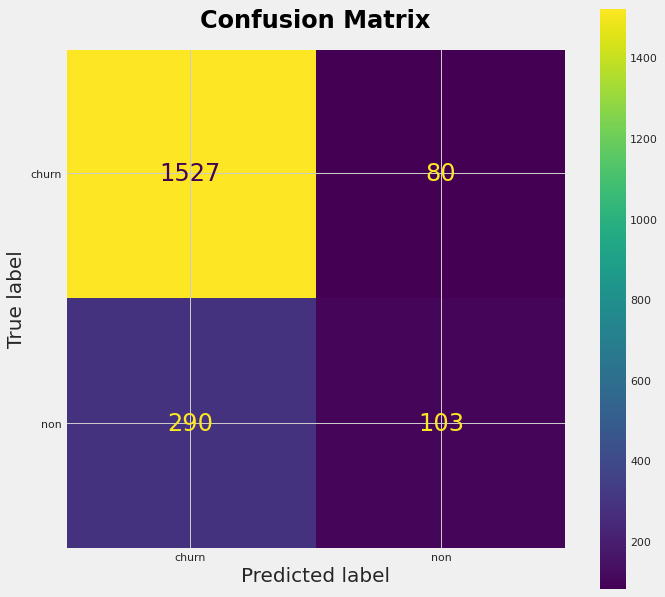

In [39]:
y_pred = rs.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Confusion Matrix', fontsize = 24, fontweight = 'bold', pad = 20, color='black')
plt.rcParams['font.size'] = 24
plt.xlabel('Predicted Label', fontsize = 20)
plt.ylabel('True Label', fontsize = 20)
plot_confusion_matrix(rs, X_test, y_test,display_labels=['churn','non'], ax=ax)
plt.show()

### Decision Tree

In [40]:
# Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# Evaluation
eval_classification(dt)

Scoring
Accuracy (Test): 0.80
Accuracy (Train): 1.00
Precision (Test): 0.48
Precision (Train): 1.00
Recall (Test): 0.50
Recall (Train): 1.00
F1 (Test): 0.49
F1 (Train): 1.00
AUC (Test Proba): 0.68
AUC (Train Proba): 1.00
Test Score: 0.80
Train Score: 1.00


In [41]:
# Tuning Hyperparameter
min_samples_split = [int(x) for x in np.linspace(1, 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10)]
max_features = ['auto', 'sqrt', 'log2', 'none']
criterion = ['gini', 'entropy']

hyperparams = dict(min_samples_split = min_samples_split,
                   min_samples_leaf = min_samples_leaf,
                   max_features = max_features,
                   criterion = criterion)

dt = DecisionTreeClassifier()
rs = RandomizedSearchCV(dt, 
                  hyperparams, 
                  cv = 5, 
                  scoring = 'roc_auc')
rs.fit(X_train, y_train)

# Evaluation
eval_classification(rs)

Scoring
Accuracy (Test): 0.81
Accuracy (Train): 0.89
Precision (Test): 0.53
Precision (Train): 0.78
Recall (Test): 0.46
Recall (Train): 0.63
F1 (Test): 0.49
F1 (Train): 0.70
AUC (Test Proba): 0.75
AUC (Train Proba): 0.95
Test Score: 0.75
Train Score: 0.95


In [42]:
y_pred = rs.predict(X_test)
y_pred_train = rs.predict(X_train)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1451  156]
 [ 214  179]]


In [43]:
rs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

###XGBoost

In [44]:
from xgboost import XGBClassifier, XGBRegressor

# Model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Evaluation
eval_classification(xgb)

Scoring
Accuracy (Test): 0.86
Accuracy (Train): 0.87
Precision (Test): 0.74
Precision (Train): 0.80
Recall (Test): 0.48
Recall (Train): 0.47
F1 (Test): 0.58
F1 (Train): 0.60
AUC (Test Proba): 0.87
AUC (Train Proba): 0.88
Test Score: 0.86
Train Score: 0.87


In [45]:
y_pred = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1540   67]
 [ 205  188]]


In [46]:
# hyperparameter hasil dari iterasi
hyperparam ={'colsample_bytree': [1],
 'gamma': [0],
 'learning_rate': [0.01],
 'max_depth': [3],
 'min_child_weight': [1],
 'n_estimators': [600],
 'reg_alpha': [0],
 'reg_lambda': [1],
 'subsample': [0.66],
 'tree_method' : ['auto'],
 'colsample_bytree': [0.7000000000000001],
 'lambda': [0.5],
 'eta': [0.98989898989899],
 'alpha': [0.2],
}

xgb = XGBClassifier(random_state=42)
xgb_tune = RandomizedSearchCV(xgb, hyperparam, random_state=42, cv = 5, scoring = 'roc_auc')
xgb_tune.fit(X_train, y_train)

eval_classification(xgb_tune)


Scoring
Accuracy (Test): 0.86
Accuracy (Train): 0.87
Precision (Test): 0.75
Precision (Train): 0.81
Recall (Test): 0.46
Recall (Train): 0.45
F1 (Test): 0.57
F1 (Train): 0.58
AUC (Test Proba): 0.87
AUC (Train Proba): 0.87
Test Score: 0.87
Train Score: 0.87


In [47]:
# cross validation
from sklearn.model_selection import cross_validate
model = XGBClassifier(random_stae=42,
 colsample_bytree= 1, 
 gamma = 0,
 learning_rate= 0.01,
 max_depth= 3,
 min_child_weight=1,
 n_estimators =600,
 reg_alpha = 0,
 reg_lambda= 1,
 subsample= 0.66,
 tree_method = 'auto',
 eta = 0.98989898989899,
 alpha= 0.2)
score = cross_validate(model, X_train, y_train, cv=5, scoring='roc_auc', return_train_score=True)

print('roc_auc (test): '+ str(score['test_score'].mean()))
print('roc_auc (train): '+ str(score['train_score'].mean()))

roc_auc (test): 0.8595358434454141
roc_auc (train): 0.8784396320626365


In [48]:
y_pred = xgb_tune.predict(X_test)
y_pred_train = xgb_tune.predict(X_train)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1546   61]
 [ 212  181]]


In [49]:
xgb_tune.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7000000000000001,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 600,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.66,
 'verbosity': 1,
 'tree_method': 'auto',
 'lambda': 0.5,
 'eta': 0.98989898989899,
 'alpha': 0.2}

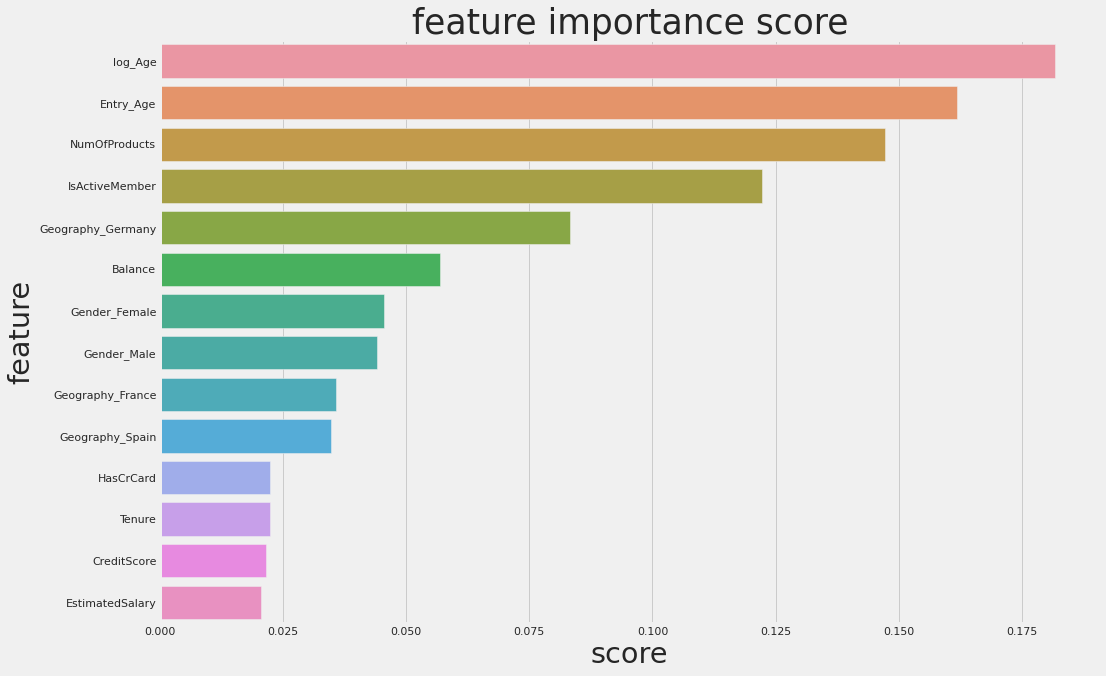

In [50]:
show_feature_importance(xgb_tune.best_estimator_)

## Oversampling 0.5

In [51]:
X_train_smote, y_train_smote = over_sampling.SMOTE(0.5, random_state=42).fit_resample(X_train, y_train)

In [52]:
print(X_train_smote.shape, y_train_smote.shape)

(9334, 14) (9334, 1)


In [53]:
Not_Churn = []
Churn = []

for i in y_train_smote['Exited']: 
    if(i == 1):
        Not_Churn.append(i)
    else :
        Churn.append(i)

print('Not_Churn:', len(Churn))
print('Churn:', len(Churn))

Not_Churn: 6223
Churn: 6223


In [54]:
def eval_classification_smote(model): 
  # Prediction
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_smote)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_smote)
  
  # Test Score
    print('Scoring')
    print('Accuracy (Test): %.2f' % accuracy_score(y_test, y_pred))
    print('Accuracy (Train): %.2f' % accuracy_score(y_train_smote, y_pred_train))
    print('Precision (Test): %.2f' % precision_score(y_test, y_pred))
    print('Precision (Train): %.2f' % precision_score(y_train_smote, y_pred_train))
    print('Recall (Test): %.2f' % recall_score(y_test, y_pred))
    print('Recall (Train): %.2f' % recall_score(y_train_smote, y_pred_train))
    print('F1 (Test): %.2f' % f1_score(y_test, y_pred))
    print('F1 (Train): %.2f' % f1_score(y_train_smote, y_pred_train))
    print('AUC (Test Proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    print('AUC (Train Proba): %.2f' % roc_auc_score(y_train_smote, y_pred_proba_train[:,1]))
    print('Test Score: %.2f' % model.score(X_test, y_test))
    print('Train Score: %.2f' % model.score(X_train_smote, y_train_smote))
  

### Logistic Regression

In [55]:
# Model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(lr)

Scoring
Accuracy (Test): 0.81
Accuracy (Train): 0.79
Precision (Test): 0.53
Precision (Train): 0.74
Recall (Test): 0.47
Recall (Train): 0.55
F1 (Test): 0.50
F1 (Train): 0.63
AUC (Test Proba): 0.78
AUC (Train Proba): 0.83
Test Score: 0.81
Train Score: 0.79


In [56]:
# Hyperparameter Tuning
penalty = ['l1','l2','none']
C = [int(x) for x in np.linspace(0.0001, 1)]
solver = ['newton-cg', 'saga', 'sag']
random_state = [42]

hyperparam = dict(penalty = penalty, 
                  C=C, 
                  solver = solver,
                  random_state=random_state)

lr = LogisticRegression(random_state=42)
lr_tune_smote = RandomizedSearchCV(lr, hyperparam, random_state=42, cv = 5, scoring = 'roc_auc')
lr_tune_smote.fit(X_train_smote, y_train_smote)

eval_classification_smote(lr_tune_smote)

Scoring
Accuracy (Test): 0.81
Accuracy (Train): 0.79
Precision (Test): 0.53
Precision (Train): 0.75
Recall (Test): 0.47
Recall (Train): 0.55
F1 (Test): 0.50
F1 (Train): 0.63
AUC (Test Proba): 0.78
AUC (Train Proba): 0.83
Test Score: 0.78
Train Score: 0.83


In [57]:
y_pred = lr_tune_smote.predict(X_test)
y_pred_train = lr_tune_smote.predict(X_train_smote)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1445  162]
 [ 209  184]]


In [58]:
lr_tune_smote.best_estimator_.get_params()

{'C': 0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': 42,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Decision Tree

In [59]:
dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote)
eval_classification_smote(dt)

Scoring
Accuracy (Test): 0.79
Accuracy (Train): 1.00
Precision (Test): 0.47
Precision (Train): 1.00
Recall (Test): 0.53
Recall (Train): 1.00
F1 (Test): 0.50
F1 (Train): 1.00
AUC (Test Proba): 0.69
AUC (Train Proba): 1.00
Test Score: 0.79
Train Score: 1.00


In [60]:
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train_smote)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1370  237]
 [ 185  208]]


In [61]:
# Tuning Hyperparameter
min_samples_split = [int(x) for x in np.linspace(1, 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10)]
max_features = ['auto', 'sqrt', 'log2', 'none']
criterion = ['gini', 'entropy']
max_depth = [900, 400, 450] # Maximum number of levels in tree

hyperparams = dict(min_samples_split = min_samples_split,
                   min_samples_leaf = min_samples_leaf,
                   max_features = max_features,
                   criterion = criterion,
                   max_depth=max_depth)

dt = DecisionTreeClassifier()

gs_dt = GridSearchCV(dt, 
                  hyperparams, 
                  cv = 5, 
                  scoring = 'roc_auc')

rs = RandomizedSearchCV(dt, 
                  hyperparams, 
                  cv = 5, 
                  scoring = 'roc_auc')

rs.fit(X_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(rs)

Scoring
Accuracy (Test): 0.80
Accuracy (Train): 0.87
Precision (Test): 0.48
Precision (Train): 0.85
Recall (Test): 0.45
Recall (Train): 0.75
F1 (Test): 0.47
F1 (Train): 0.80
AUC (Test Proba): 0.76
AUC (Train Proba): 0.95
Test Score: 0.76
Train Score: 0.95


In [62]:
y_pred = rs.predict(X_test)
y_pred_train = rs.predict(X_train_smote)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1417  190]
 [ 215  178]]


In [63]:
rs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 450,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'min_samples_split': 9,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

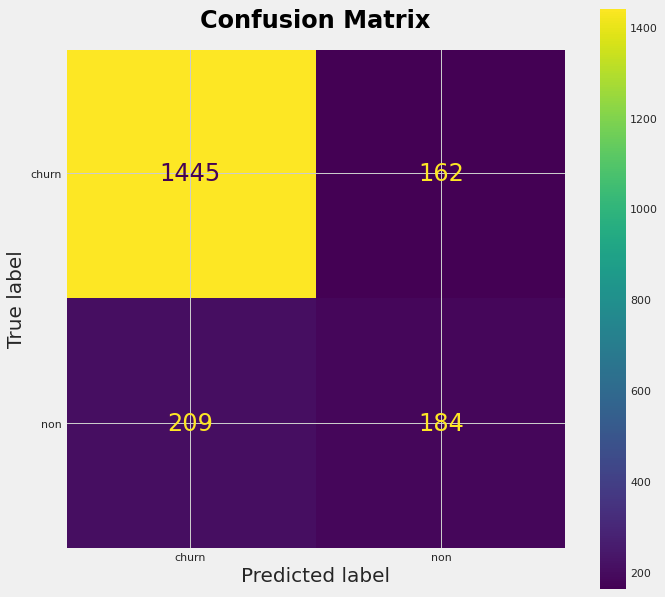

In [64]:
y_pred = lr_tune_smote.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Confusion Matrix', fontsize = 24, fontweight = 'bold', pad = 20, color='black')
plt.rcParams['font.size'] = 24
plt.xlabel('Predicted Label', fontsize = 20)
plt.ylabel('True Label', fontsize = 20)
plot_confusion_matrix(lr_tune_smote, X_test, y_test,display_labels=['churn','non'], ax=ax)
plt.show()

### XGBoost

In [65]:
from xgboost import XGBClassifier, XGBRegressor

# Model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_smote, y_train_smote)

# Evaluation
eval_classification_smote(xgb)

Scoring
Accuracy (Test): 0.86
Accuracy (Train): 0.85
Precision (Test): 0.67
Precision (Train): 0.84
Recall (Test): 0.60
Recall (Train): 0.69
F1 (Test): 0.63
F1 (Train): 0.76
AUC (Test Proba): 0.87
AUC (Train Proba): 0.92
Test Score: 0.86
Train Score: 0.85


In [66]:
y_pred = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train_smote)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1492  115]
 [ 157  236]]


In [67]:
# hyperparameter hasil dari iterasi
hyperparam ={
    'n_estimators': [50],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3, 4],  # default=6
    'reg_alpha': [1, 2],
    'reg_lambda': [1, 2],
    'subsample': [0.5, 0.75],
    'colsample_bytree': [0.50, 0.75],
    'gamma': [0.1, 0.5, 1],
    'min_child_weight': [1],
    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
}

xgb = XGBClassifier(random_state=42)
xgb_tune_smote = RandomizedSearchCV(xgb, hyperparam, random_state=42, cv = 5, scoring = 'roc_auc')
xgb_tune_smote.fit(X_train_smote, y_train_smote)

eval_classification_smote(xgb_tune_smote)


Scoring
Accuracy (Test): 0.86
Accuracy (Train): 0.82
Precision (Test): 0.68
Precision (Train): 0.84
Recall (Test): 0.54
Recall (Train): 0.56
F1 (Test): 0.60
F1 (Train): 0.67
AUC (Test Proba): 0.86
AUC (Train Proba): 0.88
Test Score: 0.86
Train Score: 0.88


In [68]:
xgb_tune_smote.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.001,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 50,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 1,
 'reg_lambda': 2,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.5,
 'verbosity': 1,
 'lambda': 0.1,
 'eta': 0.9797979797979799,
 'alpha': 0.9}

In [70]:
# cross validation
from sklearn.model_selection import cross_validate
model = XGBClassifier(random_stae=42,
 colsample_bytree= 1, gamma = 0,
 learning_rate= 0.01,
 max_depth= 3,
 min_child_weight=1,
 n_estimators =600,
 reg_alpha = 0,
 reg_lambda= 1,
 subsample= 0.66,
 tree_method = 'auto',
 eta = 0.98989898989899,
 alpha= 0.2)
score = cross_validate(model, X_train_smote, y_train_smote, cv=5, scoring='roc_auc', return_train_score=True)

print('roc_auc (test): '+ str(score['test_score'].mean()))
print('roc_auc (train): '+ str(score['train_score'].mean()))

roc_auc (test): 0.8936024887415233
roc_auc (train): 0.9068257539933686


In [71]:
y_pred = xgb_tune_smote.predict(X_test)
y_pred_train = xgb_tune_smote.predict(X_train_smote)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1504  103]
 [ 179  214]]


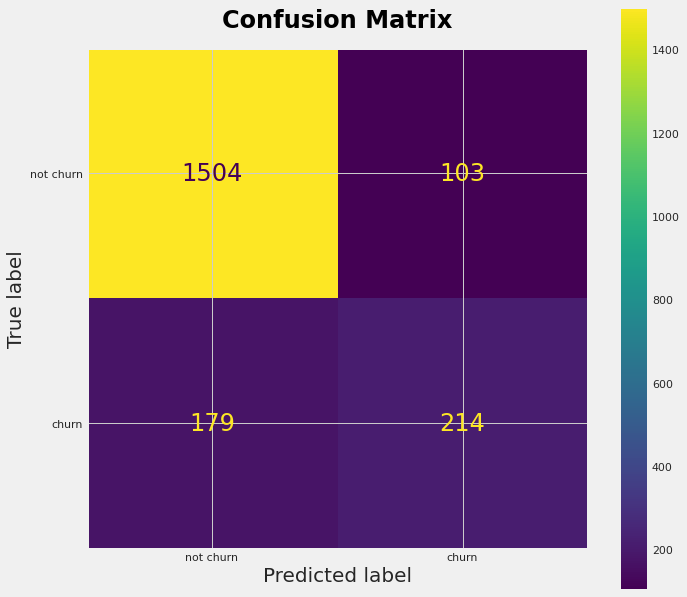

In [72]:
y_pred = xgb_tune_smote.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Confusion Matrix', fontsize = 24, fontweight = 'bold', pad = 20, color='black')
plt.rcParams['font.size'] = 24
plt.xlabel('Predicted Label', fontsize = 20)
plt.ylabel('True Label', fontsize = 20)
plot_confusion_matrix(xgb_tune_smote, X_test, y_test,display_labels=['not churn','churn'], ax=ax)
plt.show()

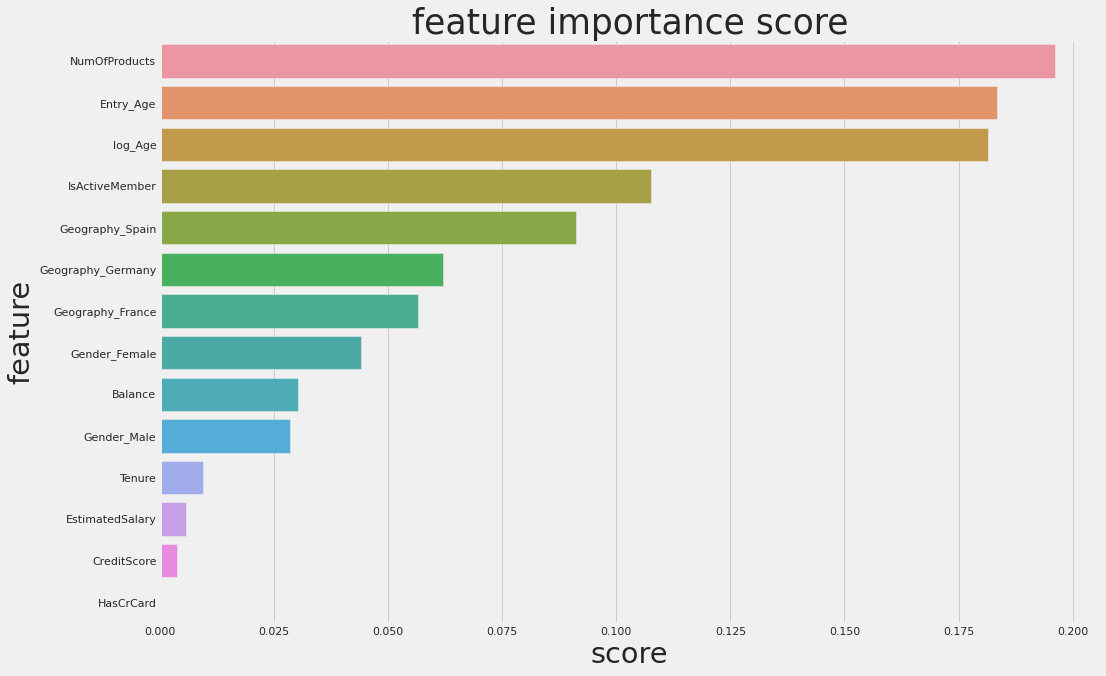

In [73]:
show_feature_importance(xgb_tune_smote.best_estimator_)

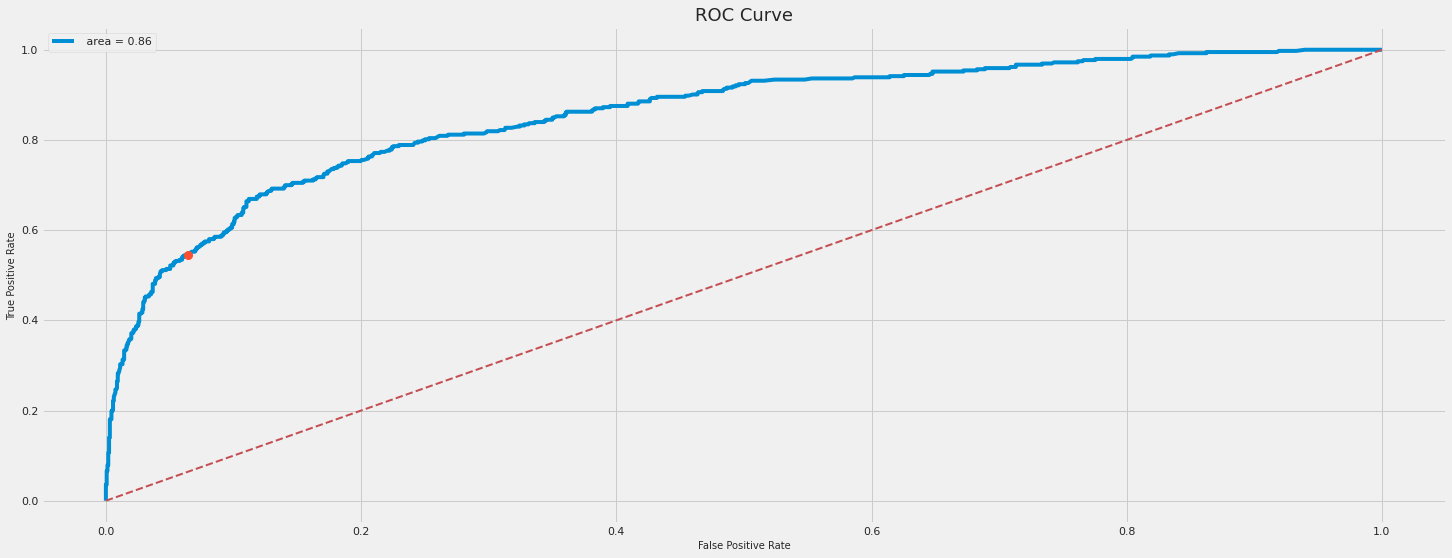

In [74]:
xgb_tuned = xgb_tune_smote
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
y_pred_prob = xgb_tuned.predict_proba(X_test)[:,1]
fig, ax = plt.subplots()
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax.set_xlabel("False Positive Rate", fontsize = 10)
ax.set_ylabel("True Positive Rate", fontsize = 10)
ax.set_title("ROC Curve", fontsize = 18)
ax.legend(loc = 'best')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

## Oversampling 1

In [75]:
X_train_smote_1, y_train_smote_1 = over_sampling.SMOTE(random_state=42).fit_resample(X_train, y_train)

In [76]:
print(X_train_smote_1.shape, y_train_smote_1.shape)

(12446, 14) (12446, 1)


In [77]:
Not_Churn = []
Churn = []

for i in y_train_smote['Exited']: 
    if(i == 1):
        Not_Churn.append(i)
    else :
        Churn.append(i)

print('Not_Churn:', len(Churn))
print('Churn:', len(Churn))

Not_Churn: 6223
Churn: 6223


In [78]:
def eval_classification_smote(model): 
  # Prediction
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_smote_1)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train_smote_1)
  
  # Test Score
    print('Scoring')
    print('Accuracy (Test): %.2f' % accuracy_score(y_test, y_pred))
    print('Accuracy (Train): %.2f' % accuracy_score(y_train_smote_1, y_pred_train))
    print('Precision (Test): %.2f' % precision_score(y_test, y_pred))
    print('Precision (Train): %.2f' % precision_score(y_train_smote_1, y_pred_train))
    print('Recall (Test): %.2f' % recall_score(y_test, y_pred))
    print('Recall (Train): %.2f' % recall_score(y_train_smote_1, y_pred_train))
    print('F1 (Test): %.2f' % f1_score(y_test, y_pred))
    print('F1 (Train): %.2f' % f1_score(y_train_smote_1, y_pred_train))
    print('AUC (Test Proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    print('AUC (Train Proba): %.2f' % roc_auc_score(y_train_smote_1, y_pred_proba_train[:,1]))
    print('Test Score: %.2f' % model.score(X_test, y_test))
    print('Train Score: %.2f' % model.score(X_train_smote_1, y_train_smote_1))
  

### Logistic Regression

In [79]:
# Model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_smote_1, y_train_smote_1)

# Evaluation
eval_classification_smote(lr)

Scoring
Accuracy (Test): 0.76
Accuracy (Train): 0.77
Precision (Test): 0.43
Precision (Train): 0.78
Recall (Test): 0.64
Recall (Train): 0.74
F1 (Test): 0.51
F1 (Train): 0.76
AUC (Test Proba): 0.78
AUC (Train Proba): 0.85
Test Score: 0.76
Train Score: 0.77


In [80]:
# Hyperparameter Tuning
penalty = ['l1','l2','none']
C = [int(x) for x in np.linspace(0.0001, 1)]
solver = ['newton-cg', 'saga', 'sag']
random_state = [42]

hyperparam = dict(penalty = penalty, 
                  C=C, 
                  solver = solver,
                  random_state=random_state)

lr = LogisticRegression(random_state=42)
lr_tune_smote = RandomizedSearchCV(lr, hyperparam, random_state=42, cv = 5, scoring = 'roc_auc')
lr_tune_smote.fit(X_train_smote_1, y_train_smote_1)

eval_classification_smote(lr_tune_smote)

Scoring
Accuracy (Test): 0.76
Accuracy (Train): 0.77
Precision (Test): 0.43
Precision (Train): 0.79
Recall (Test): 0.64
Recall (Train): 0.74
F1 (Test): 0.51
F1 (Train): 0.76
AUC (Test Proba): 0.78
AUC (Train Proba): 0.85
Test Score: 0.78
Train Score: 0.85


In [81]:
y_pred = lr_tune_smote.predict(X_test)
y_pred_train = lr_tune_smote.predict(X_train_smote_1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1278  329]
 [ 143  250]]


In [82]:
lr_tune_smote.best_estimator_.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': 42,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Decision Tree

In [83]:
dt = DecisionTreeClassifier()
dt.fit(X_train_smote_1, y_train_smote_1)
eval_classification_smote(dt)

Scoring
Accuracy (Test): 0.77
Accuracy (Train): 1.00
Precision (Test): 0.43
Precision (Train): 1.00
Recall (Test): 0.53
Recall (Train): 1.00
F1 (Test): 0.48
F1 (Train): 1.00
AUC (Test Proba): 0.68
AUC (Train Proba): 1.00
Test Score: 0.77
Train Score: 1.00


In [84]:
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train_smote_1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1338  269]
 [ 186  207]]


In [85]:
# Tuning Hyperparameter
min_samples_split = [int(x) for x in np.linspace(1, 10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10)]
max_features = ['auto', 'sqrt', 'log2', 'none']
criterion = ['gini', 'entropy']
max_depth = [900, 400, 450] # Maximum number of levels in tree

hyperparams = dict(min_samples_split = min_samples_split,
                   min_samples_leaf = min_samples_leaf,
                   max_features = max_features,
                   criterion = criterion,
                   max_depth=max_depth)

dt = DecisionTreeClassifier()

gs_dt = GridSearchCV(dt, 
                  hyperparams, 
                  cv = 5, 
                  scoring = 'roc_auc')

rs = RandomizedSearchCV(dt, 
                  hyperparams, 
                  cv = 5, 
                  scoring = 'roc_auc')

rs.fit(X_train_smote_1, y_train_smote_1)

# Evaluation
eval_classification_smote(rs)

Scoring
Accuracy (Test): 0.79
Accuracy (Train): 0.88
Precision (Test): 0.48
Precision (Train): 0.89
Recall (Test): 0.63
Recall (Train): 0.87
F1 (Test): 0.54
F1 (Train): 0.88
AUC (Test Proba): 0.79
AUC (Train Proba): 0.96
Test Score: 0.79
Train Score: 0.96


In [86]:
y_pred = rs.predict(X_test)
y_pred_train = rs.predict(X_train_smote_1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1337  270]
 [ 145  248]]


In [87]:
rs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 400,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 9,
 'min_samples_split': 9,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

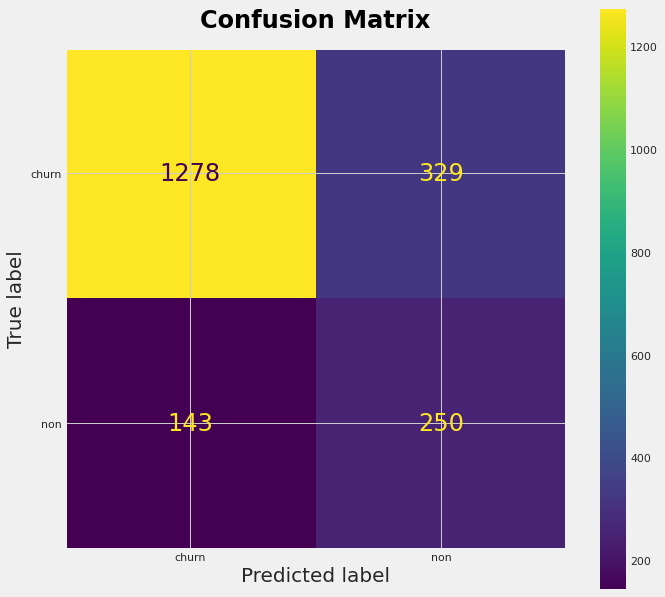

In [88]:
y_pred = lr_tune_smote.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Confusion Matrix', fontsize = 24, fontweight = 'bold', pad = 20, color='black')
plt.rcParams['font.size'] = 24
plt.xlabel('Predicted Label', fontsize = 20)
plt.ylabel('True Label', fontsize = 20)
plot_confusion_matrix(lr_tune_smote, X_test, y_test,display_labels=['churn','non'], ax=ax)
plt.show()

### XGBoost

In [89]:
from xgboost import XGBClassifier, XGBRegressor

# Model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_smote_1, y_train_smote_1)

# Evaluation
eval_classification_smote(xgb)

Scoring
Accuracy (Test): 0.84
Accuracy (Train): 0.87
Precision (Test): 0.57
Precision (Train): 0.88
Recall (Test): 0.69
Recall (Train): 0.87
F1 (Test): 0.62
F1 (Train): 0.87
AUC (Test Proba): 0.86
AUC (Train Proba): 0.95
Test Score: 0.84
Train Score: 0.87


In [90]:
y_pred = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train_smote_1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1405  202]
 [ 123  270]]


In [91]:
# hyperparameter hasil dari iterasi
hyperparam ={'colsample_bytree': [1],
 'gamma': [0],
 'learning_rate': [0.01],
 'max_depth': [3],
 'min_child_weight': [1],
 'n_estimators': [600],
 'reg_alpha': [0],
 'reg_lambda': [1],
 'subsample': [0.66],
 'tree_method' : ['auto'],
 'colsample_bytree': [0.7000000000000001],
 'lambda': [0.5],
 'eta': [0.98989898989899],
 'alpha': [0.2],
}

xgb = XGBClassifier(random_state=42)
xgb_tune_smote = RandomizedSearchCV(xgb, hyperparam, random_state=42, cv = 5, scoring = 'roc_auc')
xgb_tune_smote.fit(X_train_smote_1, y_train_smote_1)

eval_classification_smote(xgb_tune_smote)


Scoring
Accuracy (Test): 0.82
Accuracy (Train): 0.84
Precision (Test): 0.54
Precision (Train): 0.85
Recall (Test): 0.75
Recall (Train): 0.84
F1 (Test): 0.63
F1 (Train): 0.84
AUC (Test Proba): 0.86
AUC (Train Proba): 0.92
Test Score: 0.86
Train Score: 0.92


In [92]:
# cross validation
from sklearn.model_selection import cross_validate
model = XGBClassifier(random_stae=42,
 colsample_bytree= 1, gamma = 0,
 learning_rate= 0.01,
 max_depth= 3,
 min_child_weight=1,
 n_estimators =600,
 reg_alpha = 0,
 reg_lambda= 1,
 subsample= 0.66,
 tree_method = 'auto',
 eta = 0.98989898989899,
 alpha= 0.2)
score = cross_validate(model, X_train_smote_1, y_train_smote_1, cv=5, scoring='roc_auc', return_train_score=True)

print('roc_auc (test): '+ str(score['test_score'].mean()))
print('roc_auc (train): '+ str(score['train_score'].mean()))

roc_auc (test): 0.9174238688505751
roc_auc (train): 0.925433932808296


In [93]:
y_pred = xgb_tune_smote.predict(X_test)
y_pred_train = xgb_tune_smote.predict(X_train_smote_1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1352  255]
 [  97  296]]


In [94]:
xgb_tune_smote.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7000000000000001,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 600,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.66,
 'verbosity': 1,
 'tree_method': 'auto',
 'lambda': 0.5,
 'eta': 0.98989898989899,
 'alpha': 0.2}

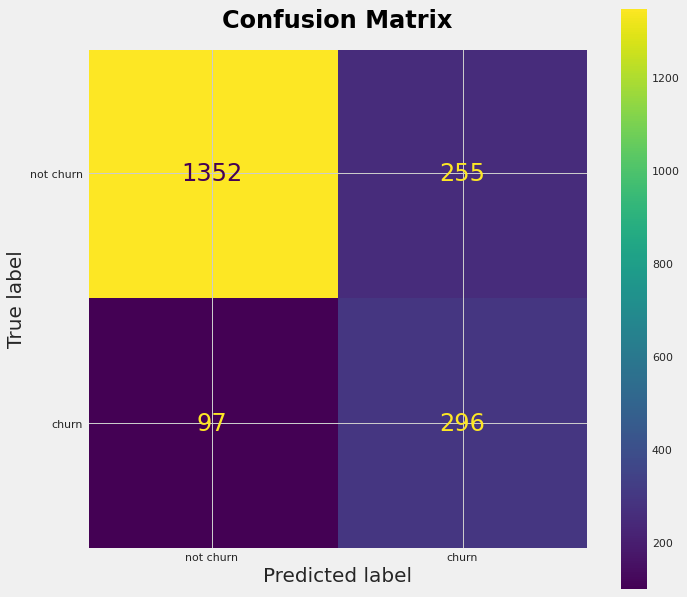

In [95]:
y_pred = xgb_tune_smote.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Confusion Matrix', fontsize = 24, fontweight = 'bold', pad = 20, color='black')
plt.rcParams['font.size'] = 24
plt.xlabel('Predicted Label', fontsize = 20)
plt.ylabel('True Label', fontsize = 20)
plot_confusion_matrix(xgb_tune_smote, X_test, y_test,display_labels=['not churn','churn'], ax=ax)
plt.show()

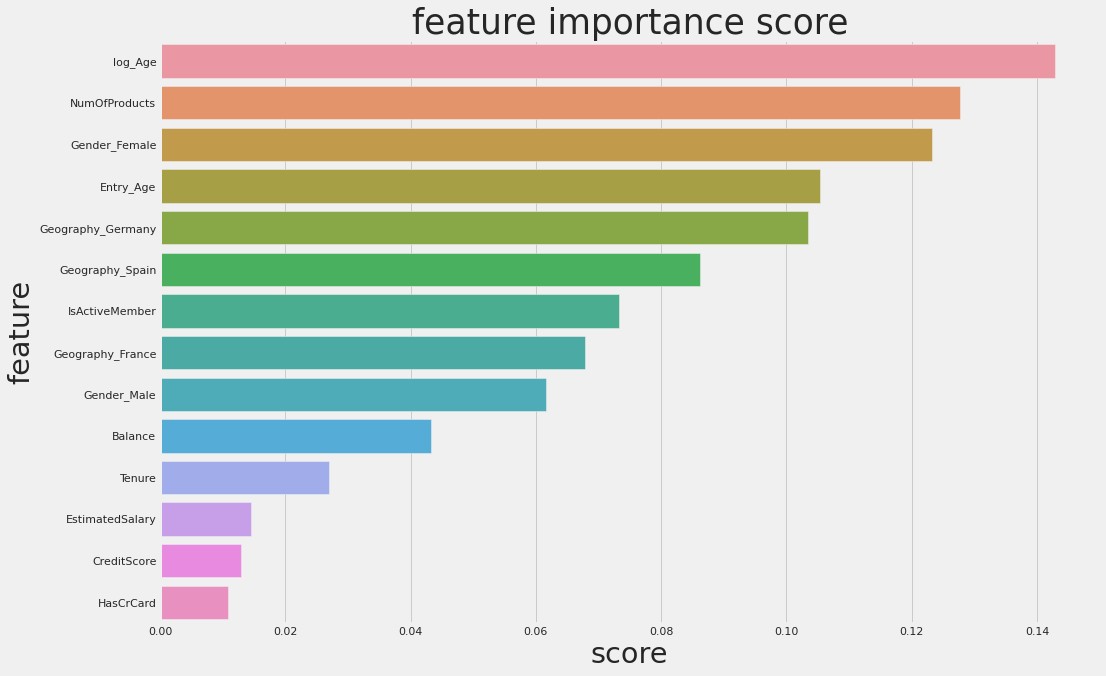

In [96]:
show_feature_importance(xgb_tune_smote.best_estimator_)

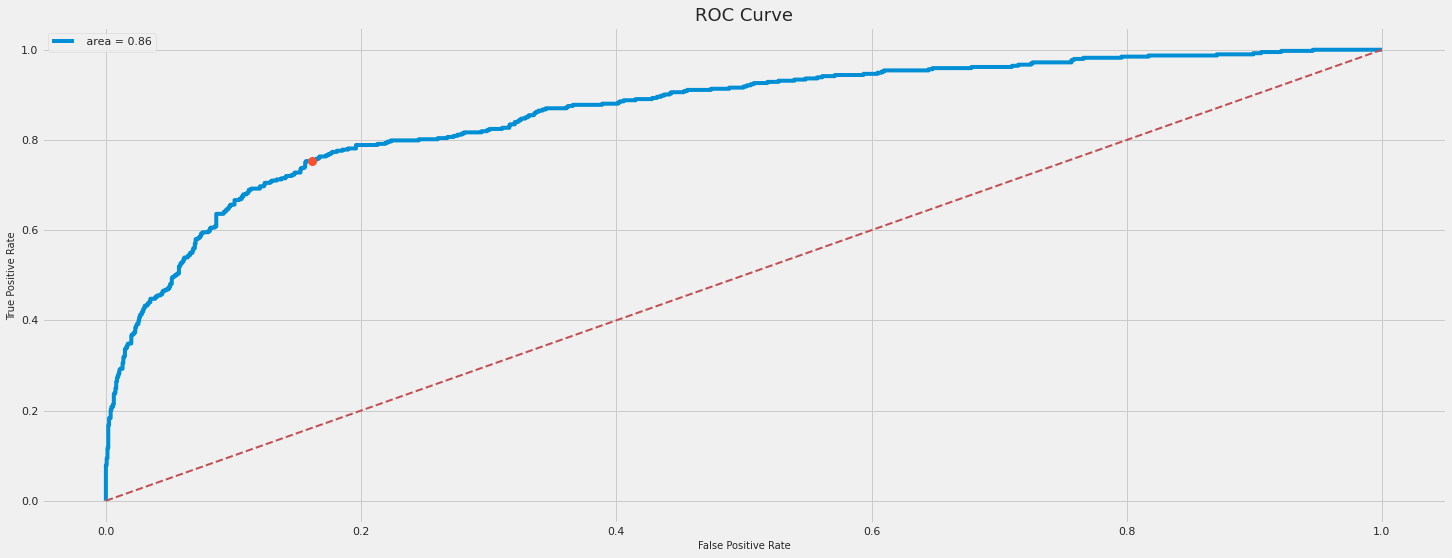

In [97]:
xgb_tuned = xgb_tune_smote
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
y_pred_prob = xgb_tuned.predict_proba(X_test)[:,1]
fig, ax = plt.subplots()
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax.set_xlabel("False Positive Rate", fontsize = 10)
ax.set_ylabel("True Positive Rate", fontsize = 10)
ax.set_title("ROC Curve", fontsize = 18)
ax.legend(loc = 'best')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

## Statified KFold

In [98]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

model = XGBClassifier(random_state=42)

In [99]:
def preporcessing(X_train,y_train,X_test):
    X_train['log_Age'] = np.log(X_train['Age'])
    X_test['log_Age'] = np.log(X_test['Age'])
    
    ss = StandardScaler()

    nums_updated = ['CreditScore','Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','log_Age']
    for n in nums_updated:
        scaler = ss.fit(X_train[[n]])
        X_train[n] = scaler.transform(X_train[[n]])
        X_test[n] = scaler.transform(X_test[[n]])
    
    return X_train,y_train, X_test

In [100]:
def training(train, test, fold_no):
    X_train = train.drop(['Exited'],axis=1)
    y_train = train.Exited
    X_test = test.drop(['Exited'],axis=1)
    y_test = test.Exited
    
    #handling outlier pada data training
    nums_updated = ['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']

    X_train['Exited']=y_train
    filtered_entries = np.array([True] * len(X_train))

    for col in nums_updated:
        zscore = abs(stats.zscore(X_train[col])) # hitung absolute z-scorenya
        filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

    X_train = X_train[filtered_entries]# filter, cuma ambil yang z-scorenya dibawah 3
    
    y_train = X_train[['Exited']]
    X_train = X_train.drop(columns = ['Exited'])
    
    preporcessing(X_train,y_train,X_test)
      
    #OHE
    for cat in ['Geography', 'Gender']:
        onehots_train = pd.get_dummies(X_train[cat], prefix=cat)
        onehots_test = pd.get_dummies(X_test[cat], prefix=cat)
        X_train = X_train.join(onehots_train)
        X_test = X_test.join(onehots_test)
    
    X_train = X_train.drop(columns=['Age', 'Geography','Gender'])
    X_test = X_test.drop(columns=['Age', 'Geography','Gender'])
    
     #Modelling
    #hyperparameters = {
     #'n_estimators': [50],
     #'learning_rate': [0.001, 0.01],
     #'max_depth': [3, 4],  # default=6
     #'reg_alpha': [1, 2],
     #'reg_lambda': [1, 2],
     #'subsample': [0.5, 0.75],
     #'colsample_bytree': [0.50, 0.75],
     #'gamma': [0.1, 0.5, 1],
     #'min_child_weight': [1]
      #              }

    # Init
    #model_tuned = RandomizedSearchCV(model, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
    #model_tuned.fit(X_train, y_train)
    model.fit(X_train, y_train)

    
    #Prediksi
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    #Evaluasi
    score_test = roc_auc_score(y_test, y_pred_proba[:,1])
    score_train = roc_auc_score(y_train, y_pred_proba_train[:,1])
    
    cm = confusion_matrix(y_test, y_pred)
    score = cross_validate(model, X_train, y_train, cv=10, scoring='roc_auc', return_train_score=True)
    

    print('Classification report of imbalanced \n',classification_report(y_test,y_pred))
    print('For Fold {} AUC Test Score is {}'.format(str(fold_no),score_test))
    print('For Fold {} AUC Train Score is {}'.format(str(fold_no),score_train))
    print('roc_auc (test): '+ str(score['test_score'].mean()))
    print('roc_auc (train): '+ str(score['train_score'].mean()))
    print('\n')
    print('For Fold {} Confusion Matrix is' '\n{}'.format(str(fold_no),cm))
    print('\n')
    #print('For Fold {} Best Hyperparameter is' '\n{}'.format(str(fold_no),xgb.best_estimator_.get_params()))
    print('---'*25, '\n')

In [101]:
fold_no = 1
for train_index,test_index in skf.split(X, y):
    train = df.iloc[train_index,:]
    test = df.iloc[test_index,:]
    training(train, test, fold_no)
    fold_no += 1

Classification report of imbalanced 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1138
           1       0.78      0.47      0.58       291

    accuracy                           0.86      1429
   macro avg       0.83      0.72      0.75      1429
weighted avg       0.86      0.86      0.85      1429

For Fold 1 AUC Test Score is 0.8687544918135754
For Fold 1 AUC Train Score is 0.8807069876038018
roc_auc (test): 0.8603735185644961
roc_auc (train): 0.8823929756809139


For Fold 1 Confusion Matrix is
[[1099   39]
 [ 155  136]]


--------------------------------------------------------------------------- 

Classification report of imbalanced 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1138
           1       0.74      0.49      0.59       291

    accuracy                           0.86      1429
   macro avg       0.81      0.72      0.75      1429
weighted avg     

# Kesimpulan Modelling
1. Split Data Train & Test yang dilakukan adalah 
    * train_test_split(X, y, test_size = 0.2, random_state = 42)
    * oversampling : X_train_smote, y_train_smote = over_sampling.SMOTE(sampling_strategy='auto',random_state=42).fit_resample(X_train, y_train)
    * StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
2. Modelling yang dilakukan adalah
    * Logistic Regression
    * Decision Tree
    * RandomForest
    * XGBoost
    * SVC
3. Model Evaluation : 
    * dilakukan proses modeling menggunakan XGBoost Classifier
    * dilakukan proses evaluasi model dengan scoring AUC test dan AUC train dengan y pred proba untuk mengecek overfitting
    *  dilakukan proses tuning dengan iterasi pada hyperparamater
      * Terkait arsitektur tree</b>:
        - max_depth: maksimal kedalaman tree untuk mencegah overfitting
        - min_child_weight: minimum weight (atau jumlah sample; jika total weightnya=1) yang dimiliki oleh node untuk membuat leaf baru (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
        - gamma: minimum loss/error reduction yang diatur untuk membuat sebuah leaf baru
        - tree_method: bagaimana metode xgboost untuk membangun sebuah treenya. algoritma yang kita pelajari tree_method = exact. Referensi lain dapat dilihat <a href='https://xgboost.readthedocs.io/en/latest/treemethod.html'>disini</a>.

      * Terkait subsampling pada proses boosting. Daripada menggunakan keseluruhan data train setiap iterasinya, kita dapat menggunakan sample pada setiap iterasinya/
          - subsample: berapa banyak baris sample yang digunakan untuk sampling di setiap stepnya. 1 untuk semua baris.
          - colsample_bytree: berapa banyak faeture yang digunakan. 1 untuk semua feature

      * Terkait control learning rate:
          - eta: step size untuk update weight feature pada xgboost, range value: 0-1. semakin kecil eta, semakin detail perbaikannya, namun butuh lebih banyak iterasi dari boosting. 
              - di sklearn, nama hyperparameternya adalah learning_rate.
    
      * Regularization pada XGBoost:
          - reg_lambda: koefisien regularisasi pada L2 norm
          - reg_alpha: koefisien regularisasi pada L1 norm

      * Terkait learning task XGBoost:
          - objective: fungsi objective yang digunakan, seperti menghitung error pada regression
          - eval_metric: metrics evaluasi yang akan digunakan pada data validation (i.e. rmse, mae, auc)
          - seed: random state

4. Model Evaluation : sudah best-fit karena nilai AUC test dan train tidak lebih dari 10%
5. Hyperparameter Tuning :
* hyperparam ={'colsample_bytree': [1],
 'gamma': [0],
 'learning_rate': [0.01],
 'max_depth': [3],
 'min_child_weight': [1],
 'n_estimators': [600],
 'reg_alpha': [0],
 'reg_lambda': [1],
 'subsample': [0.66],
 'tree_method' : ['auto'],
 'colsample_bytree': [0.7000000000000001],
 'lambda': [0.5],
 'eta': [0.98989898989899],
 'alpha': [0.2],
}

# Shap

In [102]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 24.3 MB/s 


In [103]:
model = XGBClassifier(random_stae=42,
 colsample_bytree= 1, gamma = 0,
 learning_rate= 0.01,
 max_depth= 3,
 min_child_weight=1,
 n_estimators =600,
 reg_alpha = 0,
 reg_lambda= 1,
 subsample= 0.66,
 tree_method = 'auto',
 eta = 0.98989898989899,
 alpha= 0.2)
model.fit(X_train_smote, y_train_smote)

XGBClassifier(alpha=0.2, eta=0.98989898989899, learning_rate=0.01,
              n_estimators=600, random_stae=42, subsample=0.66,
              tree_method='auto')

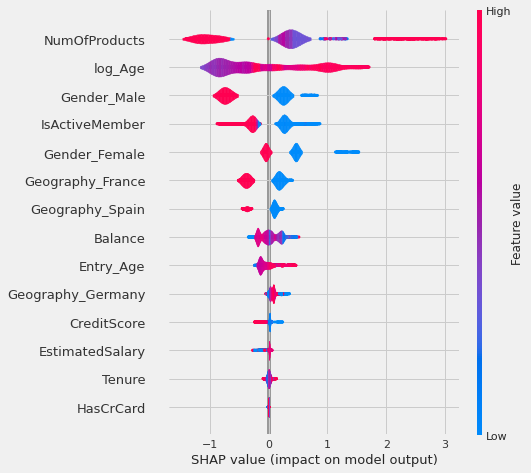

In [104]:
import shap

shap_values = shap.TreeExplainer(model).shap_values(X_train_smote)
shap.summary_plot(shap_values, X_train_smote, plot_type="violin")

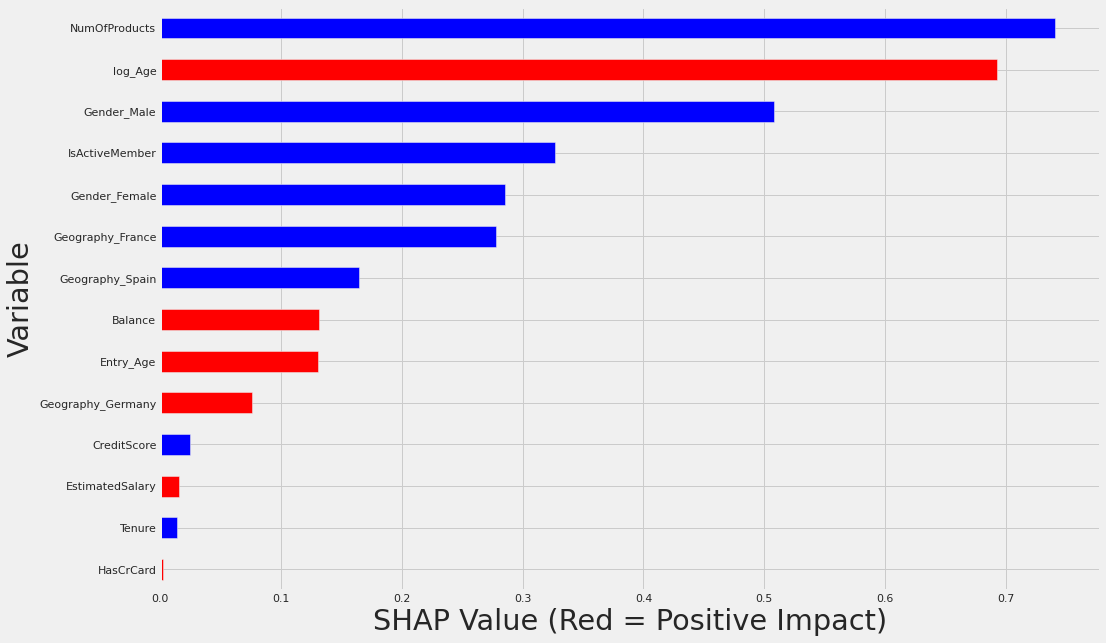

In [105]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',figsize=(15, 10),color = colorlist,legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_train_smote)

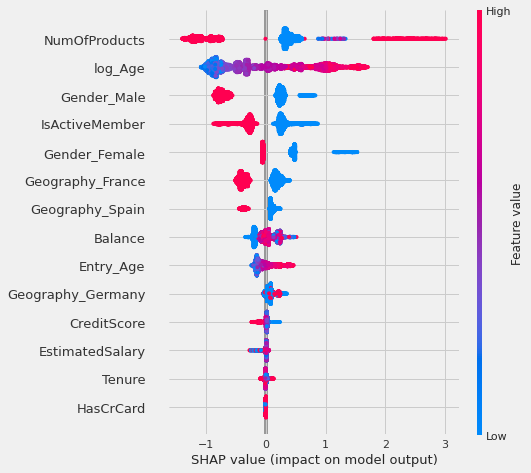

In [106]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train_smote)
#f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

Berdasarkan karakteristik diatas maka
1. Semakin tinggi nilai `Log_Age` semakin tinggi churn rate
2. Semakin banyak `NumOfProducts` yang digunakan semakin tinggi churn rate
3. `Gender_Male` semakin tinggi (male) semakin rendah churn rate
4. `Geography_France` semakin tinggi (france) semakin rendah churn rate
5. Semakin aktif member (`IsActiveMember`) semakin rendah churn rate
6. `Geography_Spain` semakin tinggi (Spain) semakin rendah churn rate
7. `Gender_Female` semakin tinggi (female) semakin rendah churn rate
8. `Geography_Germany` semakin tinggi churn rate
9. Semakin tinggi `Entry_Age` semakin tinggi churn rate
10. Semakin rendah `Balance` semakin rendah churn rate
11. Semakin rendah `EstimatedSalary` semakin rendah churn rate
12. Semakin rendah `Tenure` semakin tinggi churn rate
13. Semakin rendah `CreditScore` semakin rendah churn rate
14. `HasCrCredit` tidak mempengaruhi churn rate 

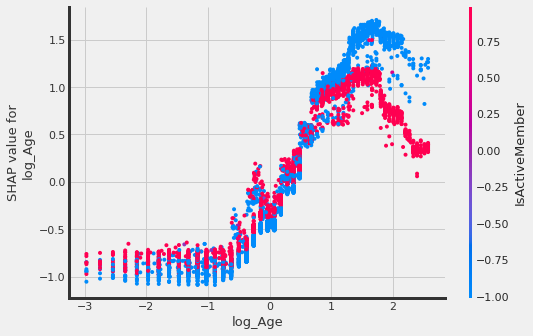

In [107]:
shap.dependence_plot('log_Age', shap_values, X_train_smote)

log_Age terhadap target memiliki korelasi positif

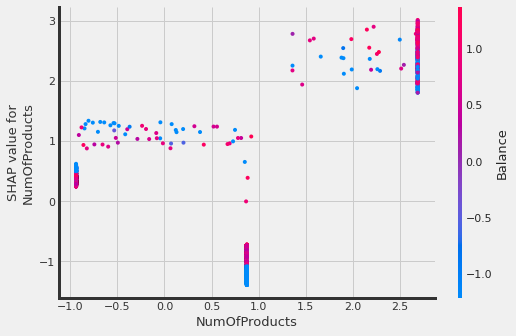

In [108]:
shap.dependence_plot('NumOfProducts', shap_values, X_train_smote)

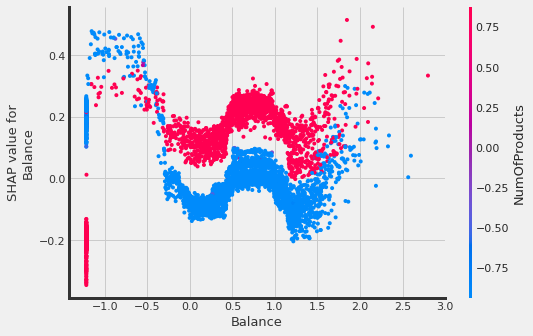

In [109]:
shap.dependence_plot('Balance', shap_values, X_train_smote)

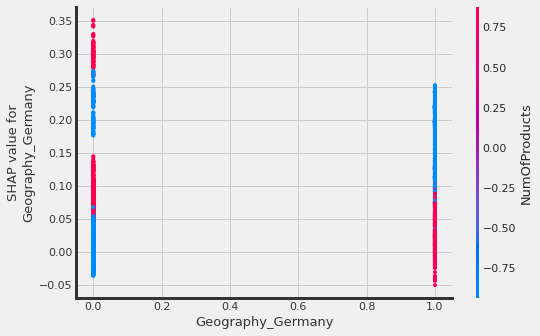

In [110]:
shap.dependence_plot('Geography_Germany', shap_values, X_train_smote)

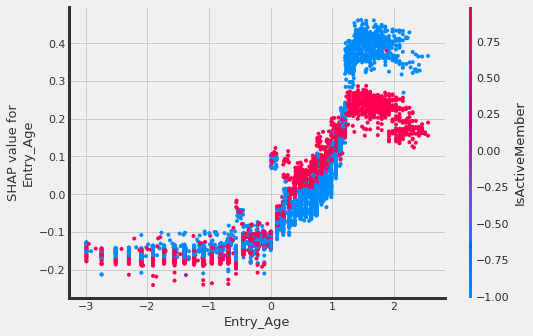

In [111]:
shap.dependence_plot('Entry_Age', shap_values, X_train_smote)

Entry_Age terhadap target memiliki korelasi positif

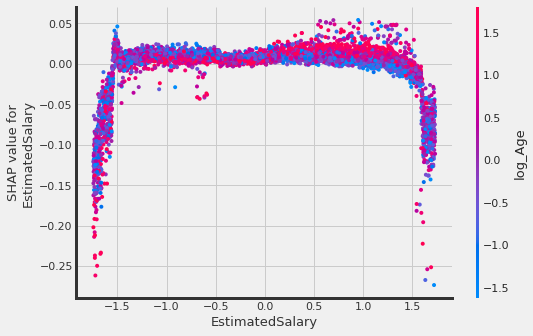

In [112]:
shap.dependence_plot('EstimatedSalary', shap_values, X_train_smote)

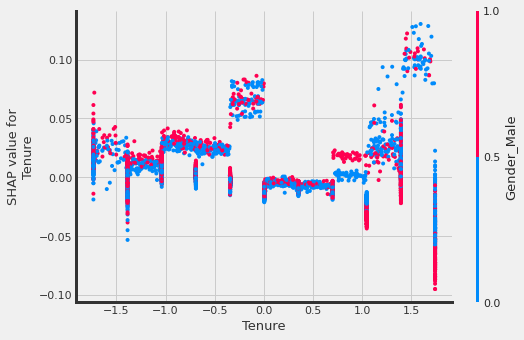

In [113]:
shap.dependence_plot('Tenure', shap_values, X_train_smote)

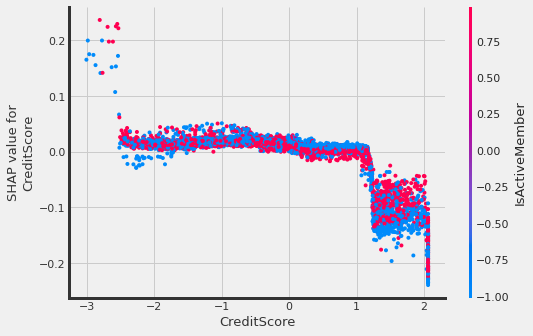

In [114]:
shap.dependence_plot('CreditScore', shap_values, X_train_smote)

## Global

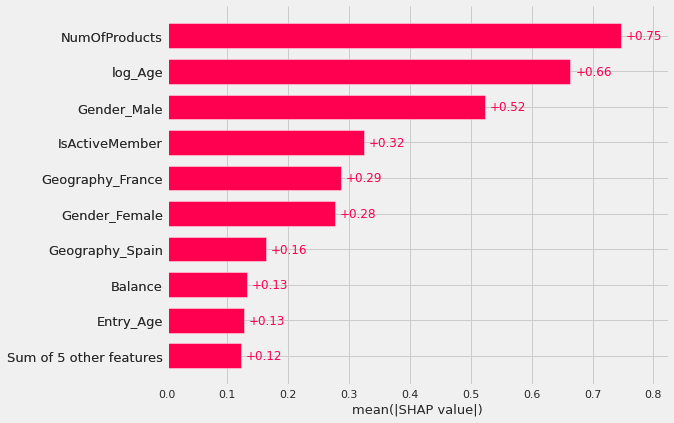

In [115]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.plots.bar(shap_values)

## Local

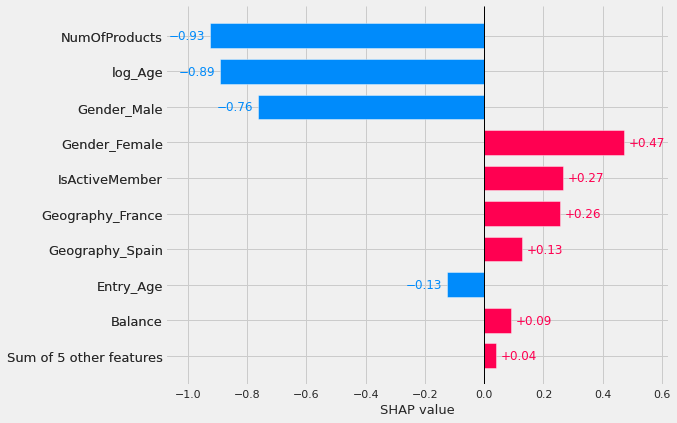

In [116]:
shap.plots.bar(shap_values[0])

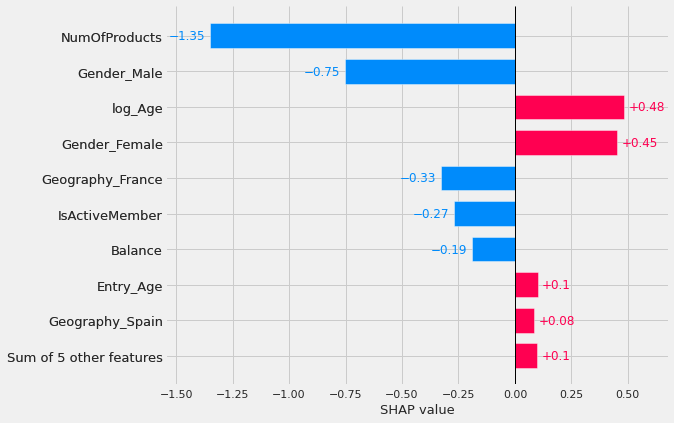

In [117]:
shap.plots.bar(shap_values[1])

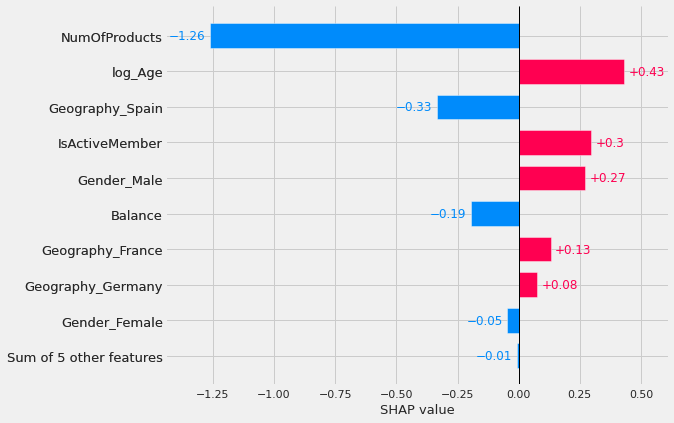

In [118]:
shap.plots.bar(shap_values[2])

In [119]:
shap.initjs()
shap.plots.force(shap_values[0])

In [120]:
shap.initjs()
shap.plots.force(shap_values[1])

In [121]:
shap.initjs()
shap.plots.force(shap_values[2])

In [122]:
shap.initjs()
shap.plots.force(shap_values[3])

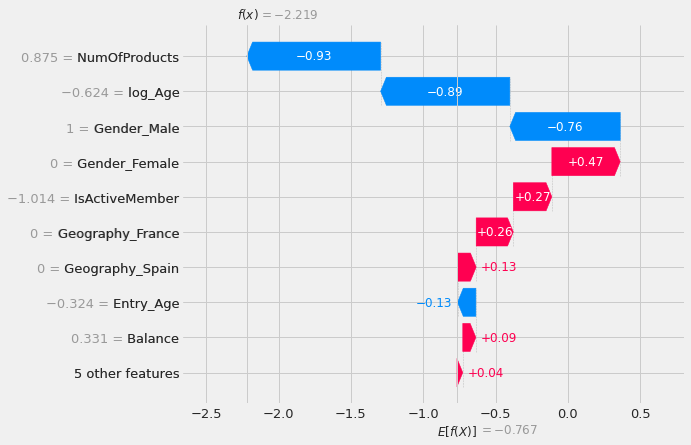

In [123]:
shap.plots.waterfall(shap_values[0])

# Kesimpulan Feature Important 
1. feature importance 3 terbesar adalah `Log_Age`, `NumOfProducts`, `Entry_Age`sehingga rekomendasi insight
  *  sangat penting melakukan penawaran produk/jasa perbankan berdasarkan umur agar tidak terjadi churn
  * jumlah produk/jasa yang dipakai customer perlu dibatasi
2. feature importance terendah adalah `HasCrCard` sehingga dilakukan feature selection atau drop column
3. Maka, diperoleh pada confusion matrix pada oversampling 1 XGBoost adalah nilai False Negative terkecil dibanding no balancing dan statified KFold


# Pengujian dengan Data Test Random

In [124]:
X_output = X_test.copy()
X_output.loc[:,'predict'] = model.predict(X_output)
X_output['actual'] = y_test

# Randomly pick some observations
random_picks = np.arange(1,1000,50) # Every 50 rows
S = X_output.iloc[random_picks]
S.tail(10)

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,log_Age,Entry_Age,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,predict,actual
6213,-0.64,0.35,0.26,0.88,0.65,0.99,1.29,-0.14,-0.21,0,1,0,0,1,0,0
8355,-1.54,-0.34,0.60,-0.94,0.65,0.99,-1.53,0.68,0.74,0,0,1,0,1,0,0
6906,0.38,-0.69,-1.22,0.88,-1.54,0.99,0.08,0.86,0.98,0,0,1,1,0,0,0
8069,-0.36,1.40,-0.43,0.88,0.65,-1.01,-0.82,0.68,0.30,0,1,0,0,1,0,0
9088,0.88,1.05,0.45,-0.94,0.65,0.99,0.17,-0.14,-0.44,0,1,0,1,0,0,1
1360,-0.05,-0.69,0.35,0.88,-1.54,0.99,-0.67,-2.15,-1.73,0,1,0,1,0,0,0
8972,-0.02,-0.34,0.05,-0.94,0.65,0.99,0.31,-0.62,-0.44,0,0,1,1,0,0,0
7535,-0.42,1.74,0.44,-0.94,0.65,-1.01,1.04,-0.14,-0.69,0,1,0,1,0,0,0
1713,-0.18,1.40,1.18,-0.94,0.65,-1.01,-0.75,0.68,0.30,1,0,0,0,1,0,0
318,-0.25,-0.69,-1.22,-0.94,0.65,-1.01,-0.26,-2.15,-1.73,0,0,1,1,0,0,0


In [125]:
pd.crosstab(X_output['actual'],X_output['predict'])

predict,0,1
actual,,
0,1482,125
1,159,234
